In [1]:
#Install Libraries
!pip install pandas pymysql sqlalchemy matplotlib seaborn

In [2]:
#Import Libraries
import pandas as pd
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import getpass

In [ ]:
#Connect to MySQL and Load Data into DataFrame
username = 'root'                   
password = getpass.getpass("GDOGaming123$")
host = 'localhost'
database = 'telco_churn_data'

#Create Connection
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# Load data from MySQL
df = pd.read_sql("SELECT * FROM churn_customers", engine)

df.head()

In [4]:
#Checking for missing data
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [5]:
#Churn Label Count
df['Churn Label'].value_counts()

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

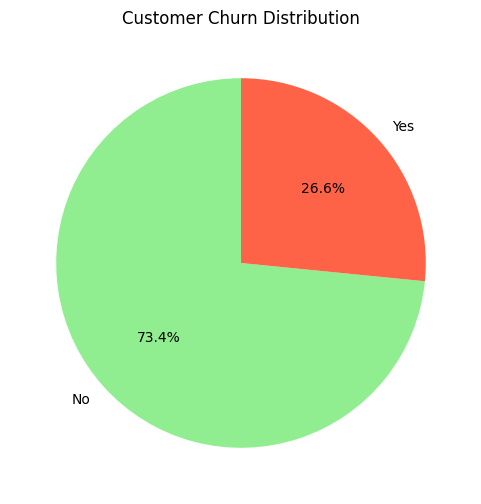

In [6]:
#Step 5: Pie Chart of Churn
churn_counts = df['Churn Label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "tomato"])
plt.title("Customer Churn Distribution")
plt.show()

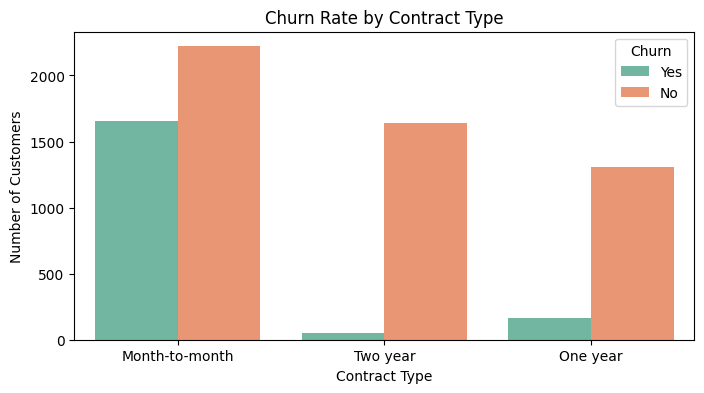

In [8]:
#Monthly charges vs Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract', hue='Churn Label', data=df, palette='Set2')
plt.title('Monthly charges vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()